In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cars = 'https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv'
wisc = 'https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv'
bike = 'https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv'
liver = 'https://assets.datacamp.com/production/repositories/1796/datasets/24126c0cd9d2bd1ca0e72446c2caa40b222193d6/indian_liver_patient.zip'

In [4]:
df = pd.read_csv(wisc)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


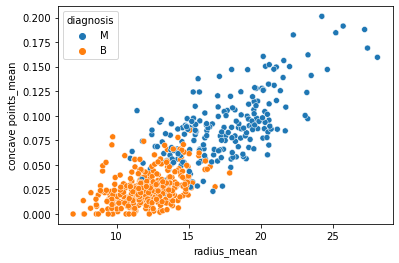

In [7]:
sns.scatterplot(x='radius_mean', y='concave points_mean', data=df, hue='diagnosis');

In [10]:
X=df[['radius_mean','concave points_mean']]
y=df['diagnosis']
X.columns = ['radius_mean','concave_points_mean']

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=1)
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

0.8859649122807017

In [14]:
print(y_pred[0:5])

['B' 'B' 'B' 'M' 'B']


In [24]:
dt_acc = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier Test set accuracy: {:.2f}".format(dt_acc))

DecisionTreeClassifier Test set accuracy: 0.89


In [25]:
#TRying it with logistic regression
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_predlr = logreg.predict(X_test)
lr_acc = accuracy_score(y_test, y_predlr)
print("LogisticRegression Test set accuracy: {:.2f}".format(lr_acc))

LogisticRegression Test set accuracy: 0.89


In [34]:
dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)
accuracy_gini = accuracy_score(y_test,y_pred)

In [32]:
X_all = df.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
y= df['diagnosis']

In [35]:
X_train, X_test,y_train, y_test = train_test_split(X_all, y, stratify=y,
                                                  test_size=0.3, random_state=1)
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy',random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print(f'Accuracy achieved by using entropy: {accuracy_entropy:.3f}')

# Print accuracy_gini
print(f'Accuracy achieved by using the gini index: {accuracy_gini:.3f}')

Accuracy achieved by using entropy: 0.906
Accuracy achieved by using the gini index: 0.921


In [36]:
auto = pd.read_csv(auto)
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


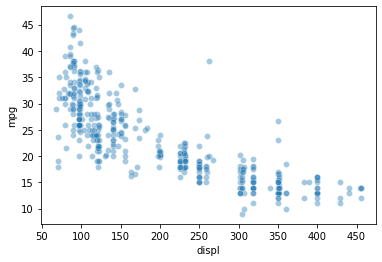

In [39]:
sns.scatterplot(x='displ',y='mpg',data=auto, alpha=.4);

In [51]:
import numpy as np
X=auto['displ'].to_numpy().reshape(-1, 1)
y=auto['mpg'].to_numpy().reshape(-1, 1)

In [50]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.1,
                          random_state=3)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print(rmse_dt)

5.102306888903137


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error as MSE
seed = 123
auto = pd.read_csv(cars)
X=auto['displ'].to_numpy().reshape(-1, 1)
y=auto['mpg'].to_numpy().reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=seed)
dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf=0.14,
                          random_state=seed)
#evaluate the list of MSE obtained by 10-fold cv
MSE_cv = - cross_val_score(dt, X_train, y_train, cv=10,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1)
dt.fit(X_train, y_train)
y_pred_train= dt.predict(X_train)
y_pred_test =dt.predict(X_test)
#cv_mse
print('CV MSE: {:.2f}'.format(MSE_cv.mean()))
print('Train MSE: {:.2f}'.format(MSE(y_train, y_pred_train)))
print('Test MSE: {:.2f}'.format(MSE(y_test, y_pred_test)))

CV MSE: 19.94
Train MSE: 17.89
Test MSE: 20.41


In [12]:
#train MSE < CV ERROR, dt overfits the training set and it suffers from high variance
#cv and test mse are roughly equal

In [21]:
df = pd.read_csv(wisc)
X= df.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
y= df['diagnosis']

## Voting Classifier in sklearn

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=seed)
#instantiate
lr=LogisticRegression(random_state=seed)
knn = KNN()
dt = DecisionTreeClassifier(random_state=seed)

clfs = [('Logistic Regression', lr),
       ('K Nearest Neighbors', knn),
       ('Classification Tree', dt)]
for clf_name, clf in clfs:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('{:s}:{:.3f}'.format(clf_name, accuracy_score(y_test, y_pred)))

Logistic Regression:0.936
K Nearest Neighbors:0.930
Classification Tree:0.930


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
vc = VotingClassifier(estimators=clfs)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
print('Voting Classifier: {:.3f}'.format(accuracy_score(y_test, y_pred)))

Voting Classifier: 0.959


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Bagging

In [31]:
# Bootstrap Aggregation
# Reduces variance of individual models in the ensemble
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,
                                                   stratify=y,
                                                   random_state=seed)
dt = DecisionTreeClassifier(max_depth=4,min_samples_leaf=0.16,random_state=seed)
#instantiate a bagging classifier
bc = BaggingClassifier(base_estimator=dt, n_estimators=300, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of Bagging cLassifier: {:.3f}'.format(accuracy))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Bagging cLassifier: 0.936


In [33]:
#out of bag  evaluation
bc =  BaggingClassifier(base_estimator=dt, n_estimators=300,
                       oob_score=True, n_jobs=-1)
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
test_accuracy = accuracy_score(y_test,y_pred)
oob_accuracy = bc.oob_score_

#test accuracy
print('Test set accuracy: {:.3f}'.format(test_accuracy))
print('OOB accuracy: {:.3f}'.format(oob_accuracy))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Test set accuracy: 0.924
OOB accuracy: 0.917


In [14]:
df = pd.read_csv(cars)
df1= pd.get_dummies(df['origin'], drop_first=True)
df = pd.concat([df,df1], axis=1).drop('origin', axis=1)
X = df.drop('mpg',axis=1)
y = df['mpg']

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
seed=1

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=seed)
rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                          random_state=seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [17]:
rmse_test = MSE(y_test,y_pred)**(1/2)
print('Test set RMSE of RF: {:.2F}'.format(rmse_test))

Test set RMSE of RF: 3.98


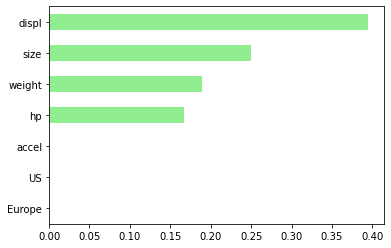

In [19]:
#Feature Importance in sklearn
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values()
sorted_importances_rf.plot(kind='barh', color='lightgreen');

In [23]:
df.head()

,mpg,displ,hp,weight,accel,size,Europe,US
0,18.0,250.0,88,3139,14.5,15.0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,1
2,36.1,91.0,60,1800,16.4,10.0,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,1
4,34.3,97.0,78,2188,15.8,10.0,1,0


In [24]:
X = df.drop(['accel','Europe','US'], axis=1)
y=df['mpg']

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
seed=1

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=seed)
rf = RandomForestRegressor(n_estimators=400,
                          min_samples_leaf=0.12,
                          random_state=seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

rmse_test = MSE(y_test,y_pred)**(1/2)
print('Test set RMSE of RF: {:.2F}'.format(rmse_test))

Test set RMSE of RF: 1.56


## Boosting

In [47]:
#adaptive boosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()
X = cancer.data;y=cancer.target

In [38]:
seed = 1
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,
                                               stratify=y,
                                               random_state=seed)
dt = DecisionTreeClassifier(max_depth=1, random_state=seed)
adb_clf = AdaBoostClassifier(estimator=dt,n_estimators=100)
adb_clf.fit(X_train, y_train)
y_pred_proba = adb_clf.predict_proba(X_test)[:,1]
adb_clf_roc_auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(adb_clf_roc_auc_score))

ROC AUC score: 0.99


In [44]:
#gradient boosting
X=df.drop(['mpg','accel','Europe','US'],axis=1)
y=df['mpg']

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
seed=1
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.3,
                                                  random_state=seed)
gbt = GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=seed)
gbt.fit(X_train,y_train)
y_pred = gbt.predict(X_test)
rmse_test=MSE(y_test,y_pred)**(1/2)
print('Test set RMSE: {:.2f}'.format(rmse_test))

Test set RMSE: 3.96


In [45]:
#stochastic gradient boosting
sgbt = GradientBoostingRegressor(max_depth=1,
                                subsample=0.8,
                                max_features=0.2,
                                n_estimators=300,
                                random_state=seed)
sgbt.fit(X_train,y_train)
y_pred = sgbt.predict(X_test)
rmse_test=MSE(y_test,y_pred)**(1/2)
print('Stochastic Gradient Boosting Test set RMSE: {:.2f}'.format(rmse_test))

Stochastic Gradient Boosting Test set RMSE: 3.92


## Tuning Hyperparameters

In [46]:
from sklearn.tree import DecisionTreeClassifier
seed = 1
dt =DecisionTreeClassifier(random_state=seed)
#printout dt's parameter
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'}


In [56]:
cancer = pd.read_csv(wisc)
X= cancer.drop(['id', 'diagnosis','Unnamed: 32'], axis=1)
y= cancer['diagnosis']

In [64]:
from sklearn.model_selection import GridSearchCV
params_dt = {
    'max_depth':[3,4,5,6],
    'min_samples_leaf':[0.04,0.06,0.08],
    'max_features':[0.2,0.4,.6,.8]
}
X_train, X_test,y_train,y_test=train_test_split(X,y,
                                               stratify=y,
                                               test_size=0.3,
                                               random_state=1)
grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                       scoring='accuracy',
                      cv=10,
                      n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

best_cv_score = grid_dt.best_score_
print('Best CV accuracy:\n', best_cv_score)
best_model = grid_dt.best_estimator_
test_acc = best_model.score(X_test,y_test)
print("Test set accuracy of Best model: {:.3f}".format(test_acc))

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.2, 'min_samples_leaf': 0.06}
Best CV accuracy:
 0.9345512820512821


In [66]:
#FR TUNING
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}

In [79]:
X=df.drop(['mpg'],axis=1)
y=df['mpg']

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=1)
params_rf = {
    'n_estimators':[300,400,500],
    'max_depth':[4,6,8],
    'min_samples_leaf':[0.1,0.2],
    'max_features':['log2','sqrt']
}
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)
grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
best_hyperparams = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 0.2, 'min_samples_leaf': 0.06}


In [81]:
best_model = grid_rf.best_estimator_
y_pred = best_model.predict(X_test)
rmse_test = MSE(y_test,y_pred)**(1/2)
print("Test set RMSE of rf: {:.2f}".format(rmse_test))

Test set RMSE of rf: 3.86
